_____________________________________________________________________________________________________________________________________________________________________________________________

Инфо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4575 entries, 0 to 4574
Columns: 191 entries, target to col2608
dtypes: float64(113), int64(78)
memory usage: 6.7 MB


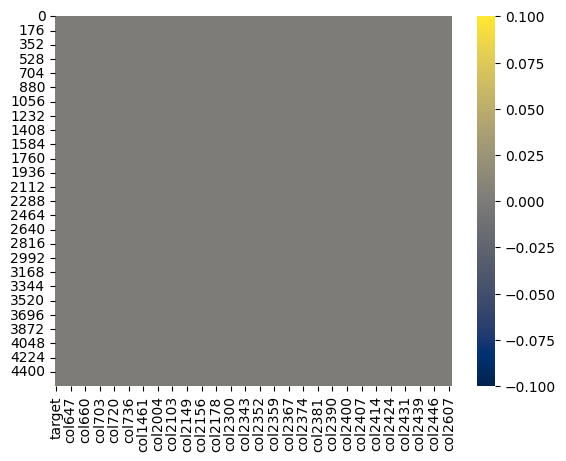

In [29]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("train1.csv")

#############################################################################################################################################

df.info()

#############################################################################################################################################

sns.heatmap(df.isnull(), cmap='cividis', annot_kws={'size': 15000})

#############################################################################################################################################

for elm in df.columns:
    nuv = df[elm].nunique()
    if nuv < 2: print(df[elm].unique())
    

_____________________________________________________________________________________________________________________________________________________________________________________________

Поиск процентов(столбцы)

In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")

dn = {}
nop_list = []
percent = 102

for elm in df.columns:
    nop = len(df) - df.isnull().sum()[elm]
    if nop < len(df) / 100 * percent: nop_list.append(nop)

for i in range(1, 102):
    asist = []

    for elm in nop_list:
        if elm < len(df) / 100 * i: asist.append(nop)

    dn[i] = len(asist)

for elm in dn:
    print(f'{elm} : {dn[elm]}')

_____________________________________________________________________________________________________________________________________________________________________________________________
Поиск маловлиятельных столбцов

In [ ]:
import pandas as pd

#############################################################################################################################################

df = pd.read_csv("train.csv")

#############################################################################################################################################

numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop(['client_id','target'], axis=1) 

percent = 10

for elm in numeric_df.columns:

    asis = df[elm].corr(df['target'])

    if asis >= percent / 100: print(f"{elm} : {asis}")


In [28]:
import pandas as pd

#############################################################################################################################################

df = pd.read_csv("train.csv")

#############################################################################################################################################

df = df.dropna(subset=df.columns)

df.to_csv("train2.csv", index=False)

change_n = []

for elm in df.columns:

    asist = True

    for i in df[elm]:
        if isinstance(i, int) or not i.is_integer(): 
            asist = False
            break
        
    if asist: change_n.append(elm)

print(change_n)

df.info()


['col372', 'col635', 'col639', 'col640', 'col647', 'col648', 'col651', 'col652', 'col655', 'col656', 'col659', 'col660', 'col667', 'col668', 'col671', 'col672', 'col707', 'col711', 'col712', 'col736', 'col739', 'col747', 'col804', 'col1456', 'col1461', 'col1464', 'col1469', 'col1488', 'col1493', 'col1967', 'col2002', 'col2053', 'col2054', 'col2055', 'col2056', 'col2057', 'col2058', 'col2177', 'col2178', 'col2218', 'col2295', 'col2296', 'col2297', 'col2298', 'col2299', 'col2300', 'col2301', 'col2303', 'col2304', 'col2313', 'col2314', 'col2315', 'col2343', 'col2344', 'col2345', 'col2346', 'col2347', 'col2348', 'col2349', 'col2350', 'col2351', 'col2352', 'col2353', 'col2354', 'col2355', 'col2356', 'col2357', 'col2358', 'col2359', 'col2360', 'col2361', 'col2362', 'col2363', 'col2364', 'col2365', 'col2366', 'col2603', 'col2604', 'col2605', 'col2606', 'col2607', 'col2608']
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 360 to 4133
Columns: 197 entries, client_id to col2608
dtypes: 